In [1]:
from environment import Environment
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from random import random

In [2]:
wine_df = load_wine()
X = wine_df.data
y = wine_df.target

env = Environment(X, y)
for i in range(30):
    response = env.run()
    #print(response)

c:\Users\Luciano\git_project\Reinforcement_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Luciano\git_project\Reinforcement_Learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

In [3]:
env.history

{'model': ['KNN',
  'RandomForest',
  'SVM',
  'DecisionTree',
  'LogisticRegression',
  'KNN',
  'RandomForest',
  'SVM',
  'LogisticRegression',
  'RandomForest',
  'DecisionTree',
  'SVM'],
 'f1': [np.float64(0.7222222222222222),
  np.float64(0.9717752234993614),
  np.float64(0.80242656449553),
  np.float64(0.9448559670781892),
  np.float64(0.9721867461331064),
  np.float64(0.7222222222222222),
  np.float64(0.9717752234993614),
  np.float64(0.80242656449553),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(0.9448559670781892),
  np.float64(0.794334146058284)],
 'recall': [np.float64(0.7222222222222222),
  np.float64(0.9722222222222222),
  np.float64(0.8055555555555556),
  np.float64(0.9444444444444444),
  np.float64(0.9722222222222222),
  np.float64(0.7222222222222222),
  np.float64(0.9722222222222222),
  np.float64(0.8055555555555556),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(0.9444444444444444),
  np.float64(0.8333333333333334)],
 'precision': [np.float64(0.7222222222

In [4]:
env.history["precision"][:15], env.history["accuracy"][-10:]

([np.float64(0.7222222222222222),
  np.float64(0.974074074074074),
  np.float64(0.801058201058201),
  np.float64(0.9513888888888888),
  np.float64(0.974074074074074),
  np.float64(0.7222222222222222),
  np.float64(0.974074074074074),
  np.float64(0.801058201058201),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(0.9513888888888888),
  np.float64(0.8717348927875244)],
 [0.8055555555555556,
  0.9444444444444444,
  0.9722222222222222,
  0.7222222222222222,
  0.9722222222222222,
  0.8055555555555556,
  1.0,
  1.0,
  0.9444444444444444,
  0.8333333333333334])

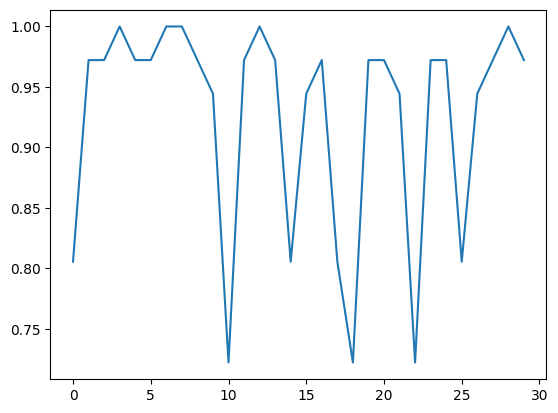

In [3]:
plt.plot(env.history["recall"])

(array([ 6.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,
         0.,  0.,  3.,  0.,  0.,  0.,  5.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
        2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 20 artists>)

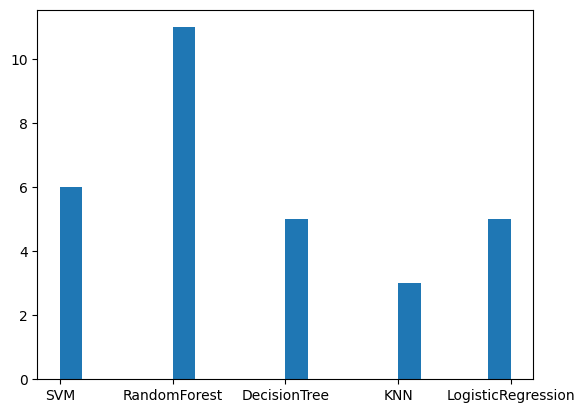

In [4]:
plt.hist(env.history["model"], bins=20)